In [1]:
import numpy as np
import sympy as sp
import matplotlib.pyplot as plt
import qutip as q
import time

In [2]:
# Funcion que me devuelve el operador de espin en una cierta componente y el operador de spin total
def spin_operator(N, component):
    """
    N: int (numero de qubits)
    Component: str (componente del momento angular, 'x', 'y', 'z')
    returns Qobj
    """
    if component == 'x':
        op = q.sigmax()
    elif component == 'y':
        op = q.sigmay()
    elif component == 'z':
        op = q.sigmaz()
    else: 
        raise ValueError('La componente tiene que se x, y, o z')
    
    # Construimos los operadores
    total_operator = 0
    indv_operators = []
    for i in range(N):
        operators = [q.qeye(2) for _ in range(N)]
        operators[i] = op
        indv_operators.append(q.tensor(operators))
        total_operator += q.tensor(operators)
    
    return total_operator, indv_operators


# Funcion que me da el hamiltoniano de Ising cuantico y su operador de salto
def ising(params, N):
    # Parametros
    om = params[0]
    v = params[1]
    a = params[2]
    gam = params[3]
    
    # Sacamos los terminos
    spin_z = spin_operator(N, component = 'z')[1]
    todo_x = spin_operator(N, component = 'x')[0]
    spin_x = spin_operator(N, component = 'x')[1]
    spin_y = spin_operator(N, component = 'y')[1]
    
    list_J = []
    suma = 0
    for i in range(len(spin_z)):
        list_J.append((np.sqrt(gam)/2)*(spin_x[i] - 1.j*spin_y[i]))
        for j in range(len(spin_z)):
            if(i < j):
                suma += (spin_z[i]*spin_z[j])/(np.abs(i-j)**a)
                
    H = om*todo_x + v*suma
    return H, list_J

# Funcion que me permite obtener la matriz densidad de la que hablan en el articulo
def densidad(N):
    return q.basis(int(2**N), 0)*(q.basis(int(2**N), 0)).dag(), q.basis(int(2**N), 0)

# Funcion que me da el hamiltoniano y el operador de salto del modelo de Ising pero para a tendiendo a infinito
def ising_inf(params, N):
    # Parametros
    om = params[0]
    v = params[1]
    a = params[2]
    gam = params[3]
    
    # Sacamos los terminos
    spin_z = spin_operator(N, component = 'z')[1]
    todo_x = spin_operator(N, component = 'x')[0]
    spin_x = spin_operator(N, component = 'x')[1]
    spin_y = spin_operator(N, component = 'y')[1]
    
    list_J = []
    suma = 0
    for i in range(len(spin_z)):
        list_J.append((np.sqrt(gam)/2)*(spin_x[i] - 1.j*spin_y[i]))
        for j in range(len(spin_z)):
            if(i < j):
                suma += spin_z[i]*spin_z[j]/np.abs(i-j)**a
                
    H = om*todo_x
    return H, list_J

0
0 4.0 0.1
1 3.6454545454545455 0.1
2 3.290909090909091 0.1
3 2.9363636363636365 0.1
4 2.581818181818182 0.1
5 2.2272727272727275 0.1
6 1.8727272727272726 0.1
7 1.518181818181818 0.1
8 1.1636363636363636 0.1
9 0.8090909090909091 0.1
10 0.4545454545454546 0.1
11 0.1 0.1
1
0 4.0 0.7272727272727273
1 3.6454545454545455 0.7272727272727273
2 3.290909090909091 0.7272727272727273
3 2.9363636363636365 0.7272727272727273
4 2.581818181818182 0.7272727272727273
5 2.2272727272727275 0.7272727272727273
6 1.8727272727272726 0.7272727272727273
7 1.518181818181818 0.7272727272727273
8 1.1636363636363636 0.7272727272727273
9 0.8090909090909091 0.7272727272727273
10 0.4545454545454546 0.7272727272727273
11 0.1 0.7272727272727273
2
0 4.0 1.3545454545454547
1 3.6454545454545455 1.3545454545454547
2 3.290909090909091 1.3545454545454547
3 2.9363636363636365 1.3545454545454547
4 2.581818181818182 1.3545454545454547
5 2.2272727272727275 1.3545454545454547
6 1.8727272727272726 1.3545454545454547
7 1.518181818

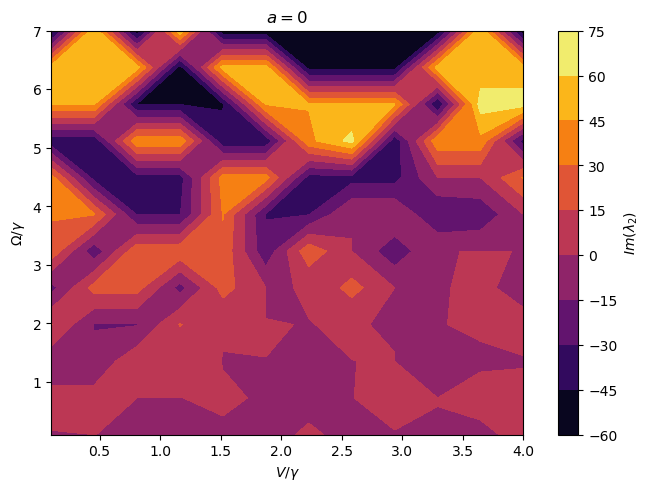

Tiempo: 2401.4959845542908


In [4]:
inicio = time.time()

# Elegimos los parametros queno van a cambiar
gam = 1
a = 0
N = 5
om_values = np.linspace(4, 0.1, 12)
v_values = np.linspace(0.1, 7, 12)
X, Y = np.meshgrid(om_values, v_values)
Z = np.zeros_like(X, dtype = 'complex')
d0, ini = densidad(N)
A_total =(2*np.pi**2)/(0.3**2)
# Recorremos los valores de los parametros
for i in range(X.shape[0]):
    print(i)
    for j in range(X.shape[1]):
        print(j, X[i, j], Y[i, j])
        params = [X[i, j]*gam, Y[i, j]*gam, a, gam]
        H, list_J = ising(params, N)
        L = q.liouvillian(H, list_J)
        todoh = (L.dag()).eigenstates(sparse = True, sort = 'high', eigvals = N-2, maxiter = 1e7)
        vals, vects = todoh
        Z[i, j] = vals[1]
        #Z[i, j] = sorted(vals, key = np.real)[1]
        
# Representamos 
fig1, ax2 = plt.subplots(layout='constrained')
#CS = ax2.contourf(X, Y, Z, 10, cmap=plt.cm.bone)
CS = ax2.contourf(X, Y, np.imag(Z), 10, cmap = 'inferno')
#CS = ax2.contourf(X, Y, Z, 10, cmap = 'viridis')
# Note that in the following, we explicitly pass in a subset of the contour
# levels used for the filled contours.  Alternatively, we could pass in
# additional levels to provide extra resolution, or leave out the *levels*
# keyword argument to use all of the original levels.

#CS2 = ax2.contour(CS, levels=CS.levels[::2], colors='r')

ax2.set_title(r'$a = 0$')
ax2.set_xlabel(r'$V / \gamma$')
ax2.set_ylabel(r'$\Omega / \gamma$')

# Make a colorbar for the ContourSet returned by the contourf call.
cbar = fig1.colorbar(CS)
cbar.ax.set_ylabel(r'$Im(\lambda_2)$')
# Add the contour line levels to the colorbar
#cbar.add_lines(CS2)
    
plt.show()

fin = time.time()
print('Tiempo: ' + str(fin-inicio))

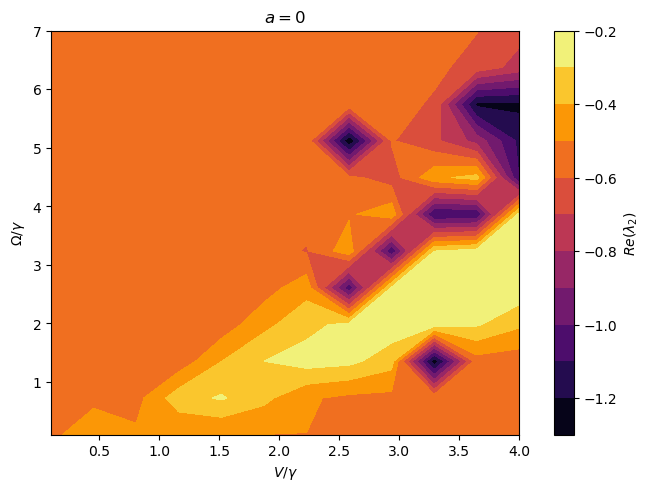

In [5]:
# Representamos 
fig1, ax2 = plt.subplots(layout='constrained')
#CS = ax2.contourf(X, Y, Z, 10, cmap=plt.cm.bone)
CS = ax2.contourf(X, Y, np.real(Z), 10, cmap = 'inferno')
#CS = ax2.contourf(X, Y, Z, 10, cmap = 'viridis')
# Note that in the following, we explicitly pass in a subset of the contour
# levels used for the filled contours.  Alternatively, we could pass in
# additional levels to provide extra resolution, or leave out the *levels*
# keyword argument to use all of the original levels.

#CS2 = ax2.contour(CS, levels=CS.levels[::2], colors='r')

ax2.set_title(r'$a = 0$')
ax2.set_xlabel(r'$V / \gamma$')
ax2.set_ylabel(r'$\Omega / \gamma$')

# Make a colorbar for the ContourSet returned by the contourf call.
cbar = fig1.colorbar(CS)
cbar.ax.set_ylabel(r'$Re(\lambda_2)$')
# Add the contour line levels to the colorbar
#cbar.add_lines(CS2)
    
plt.show()